## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading and exploring the dataset

In [3]:
file = 'education-economy-data.csv'

df = pd.read_csv(file)

In [4]:
df.head()

,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


In [5]:
df.tail()

,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
186,Venezuela,97.1,1.92,3.888648e+11,1.152460,13147.680842,Mid,8.000,South America
187,Vietnam,95.4,0.82,4.297170e+11,5.046431,4282.088517,Low,1.645,Asia
188,Yemen,54.1,0.31,3.387656e+10,-4.408199,477.409029,Very Low,17.091,Asia
189,Zambia,87.4,1.19,2.757796e+10,5.367943,1330.727806,Very Low,5.905,Africa
190,Zimbabwe,89.0,0.21,3.523137e+10,5.336730,2156.034004,Low,8.759,Africa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       191 non-null    object 
 1   Literacy Rate                 191 non-null    float64
 2   Physician Density             191 non-null    float64
 3   GDP (Current USD)             191 non-null    float64
 4   GDP Growth (% Annual)         191 non-null    float64
 5   GDP per Capita (Current USD)  191 non-null    float64
 6   GDP per Capita Category       191 non-null    object 
 7   Unemployment Rate (%)         191 non-null    float64
 8   Continent                     191 non-null    object 
dtypes: float64(6), object(3)
memory usage: 13.6+ KB


In [7]:
df.describe()

,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),Unemployment Rate (%)
count,191.000000,191.000000,1.910000e+02,191.000000,191.000000,191.000000
mean,86.994764,1.848639,5.427605e+11,2.666018,18796.795066,7.522831
std,17.622097,1.679639,2.452696e+12,4.362681,30535.286667,7.092726
min,26.800000,0.010000,6.228031e+07,-20.111576,193.007146,0.130000
25%,81.800000,0.345000,1.356848e+10,0.979868,2284.223590,3.139500
50%,95.600000,1.470000,4.260088e+10,2.733798,6947.359287,5.264000
75%,99.000000,2.950000,2.651225e+11,4.987486,22322.354985,9.027000
max,100.000000,8.420000,2.772070e+13,33.802617,256580.515100,50.000000


In [8]:
df.describe(include='object')

,Country,GDP per Capita Category,Continent
count,191,191,191
unique,191,5,6
top,Afghanistan,Low,Africa
freq,1,55,52


In [9]:
df.shape

(191, 9)

In [10]:
df.isnull().sum()

Country                         0
Literacy Rate                   0
Physician Density               0
GDP (Current USD)               0
GDP Growth (% Annual)           0
GDP per Capita (Current USD)    0
GDP per Capita Category         0
Unemployment Rate (%)           0
Continent                       0
dtype: int64

## Analyzing Data

### Visualizing a pairplot of the numeric columns

It is possible to notice some correlation between the numeric columns. Plotting a correlation heatmap will make these relationships clearer.

In [11]:
sns.set_style('white')

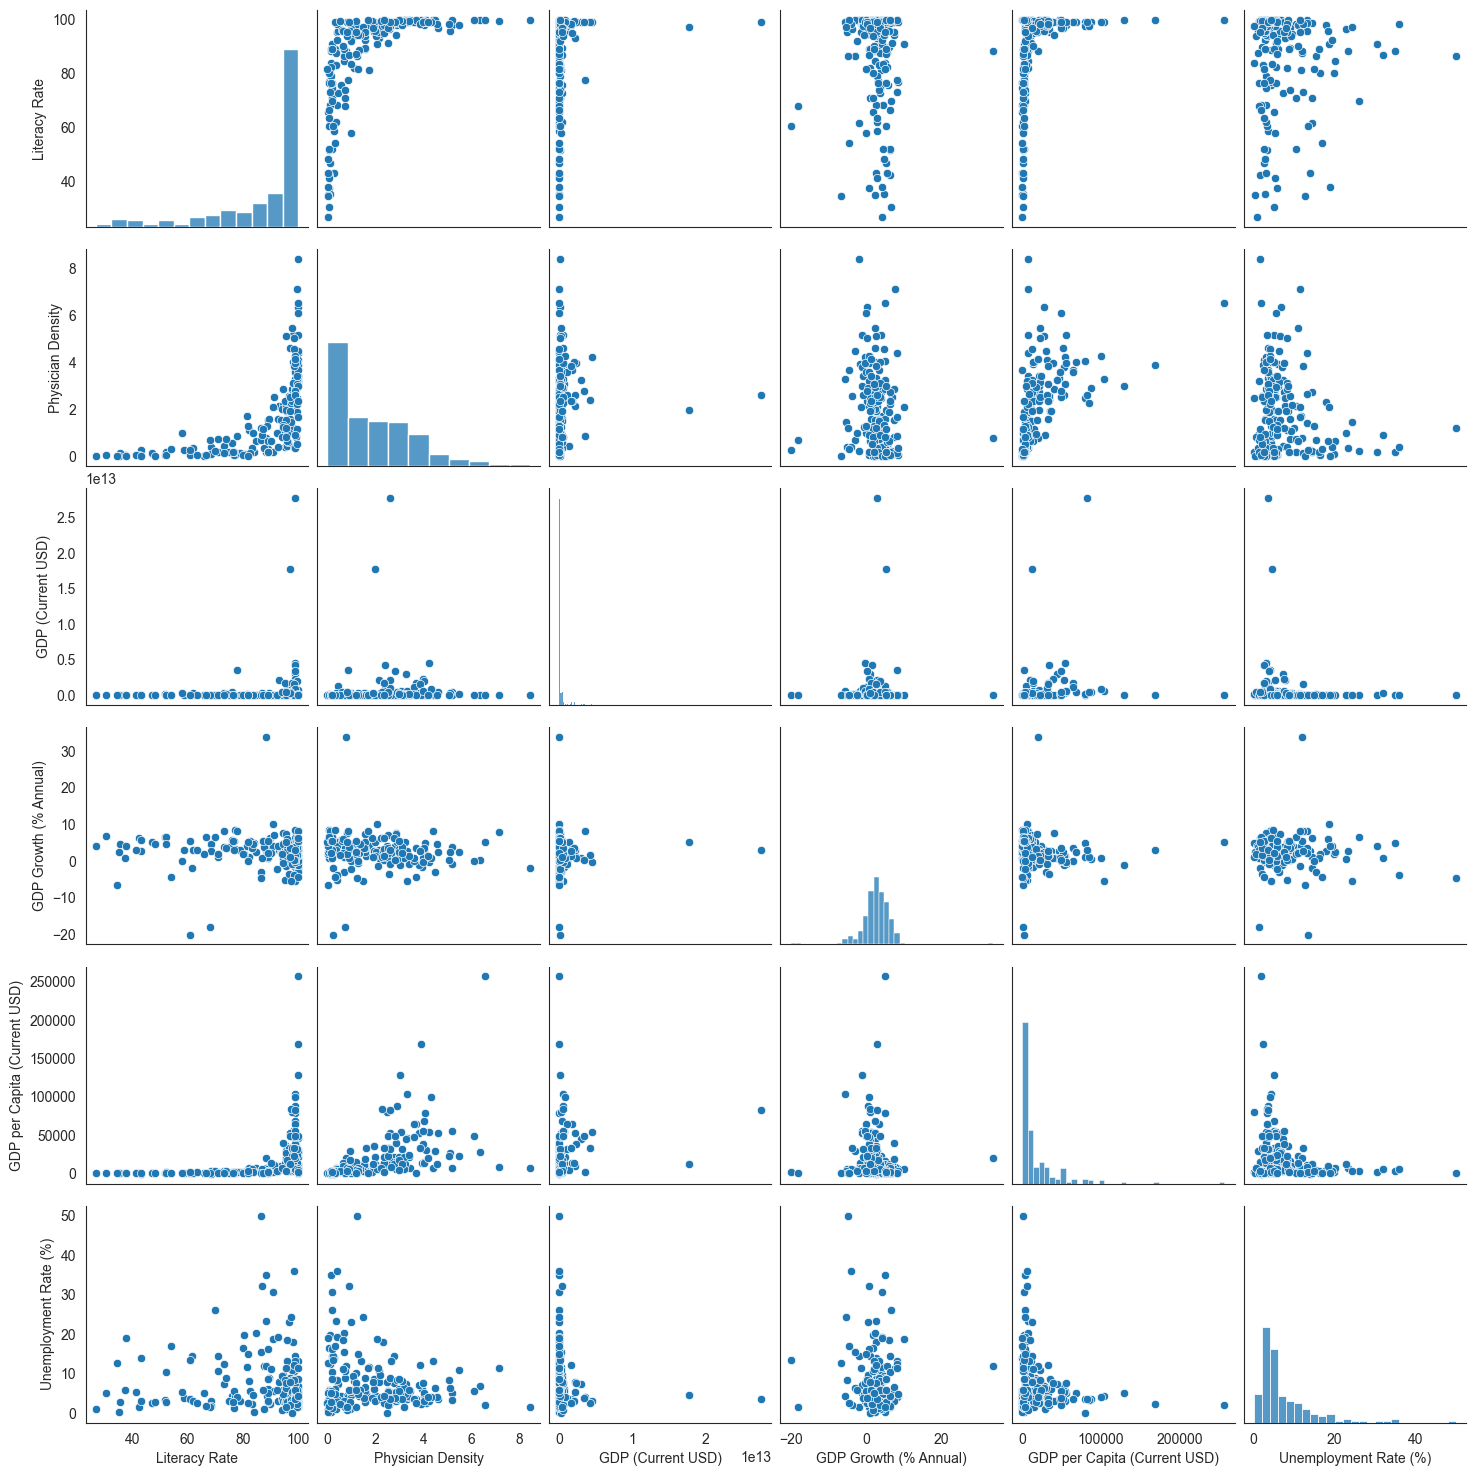

In [12]:
sns.pairplot(df)
plt.show()

### Analyzing the correlation between the numeric columns

The correlation heatmap suggests a strong positive correlation between the Physician Density and the Literacy Rate (0.61), and a moderate correlation between Physician Density and GDP per Capita (0.54).

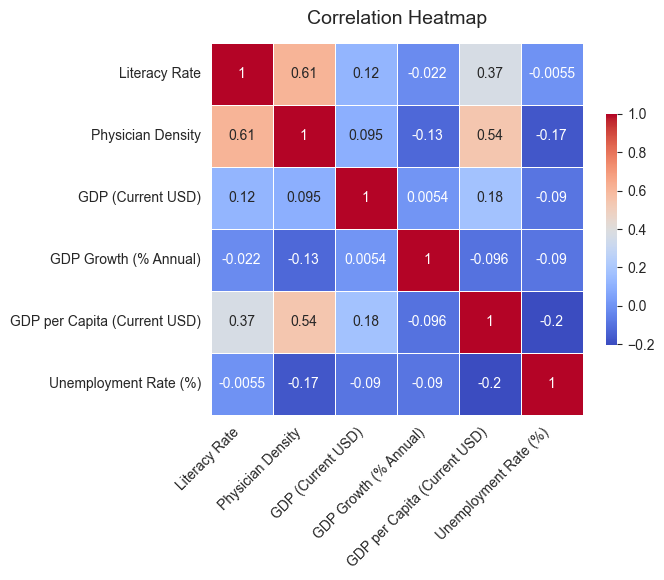

In [13]:
plt.figure(figsize=(6, 6))

corr = df.select_dtypes(include='float64').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap', fontsize=14, y=1.03)
plt.xticks(rotation=45, ha='right')
plt.show()

### Visualizing and examining data regarding continents

In [14]:
continent_colors = {
    'Europe': '#3274A1',
    'Asia': '#C03D3E',
    'North\nAmerica': '#3A923A',
    'South\nAmerica': '#E1812C',
    'Africa': '#845B53',
    'Oceania': '#9372B2'
}

The bar plot below shows that Europe has the highest Physician Density among all continents, while Africa has the lowest.

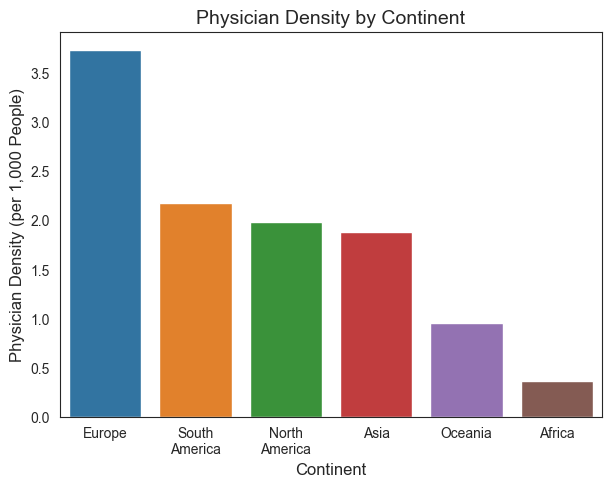

In [15]:
plt.figure(figsize=(7, 5))

df_grouped = df.groupby('Continent')['Physician Density'].mean().sort_values(ascending=False).reset_index()

df_grouped['Continent'] = df_grouped['Continent'].replace({
    'South America': 'South\nAmerica',
    'North America': 'North\nAmerica'
})

sns.barplot(data=df_grouped, x='Continent', y='Physician Density', hue='Continent', palette=continent_colors, saturation=1, legend=False)

plt.title('Physician Density by Continent', fontsize=14)
plt.ylabel('Physician Density (per 1,000 People)', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.show()

The chart shows that almost the entire population of Europe is literate, followed by South America, Oceania, North America, Asia, and Africa.

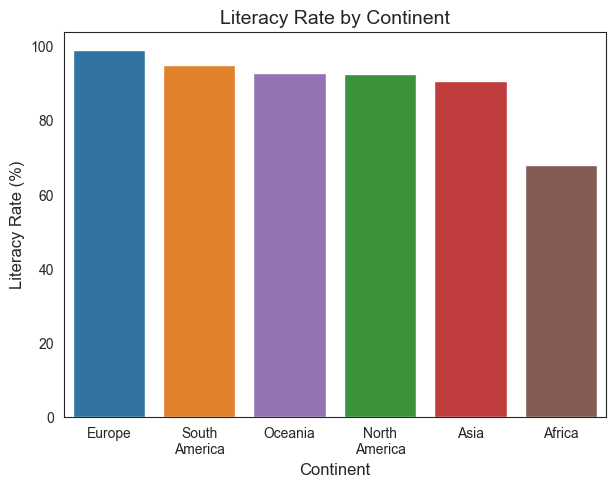

In [16]:
plt.figure(figsize=(7, 5))

df_grouped = df.groupby('Continent')['Literacy Rate'].mean().sort_values(ascending=False).reset_index()

df_grouped['Continent'] = df_grouped['Continent'].replace({
    'South America': 'South\nAmerica',
    'North America': 'North\nAmerica'
})

sns.barplot(data=df_grouped, x='Continent', y='Literacy Rate', hue='Continent', palette=continent_colors, saturation=1, legend=False)

plt.title('Literacy Rate by Continent', fontsize=14)
plt.ylabel('Literacy Rate (%)', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.show()

The next bar plot now shows that Europe is far ahead of the other continents in terms of GDP per Capita. This may be because it has the highest Physician Density and Literacy Rate.

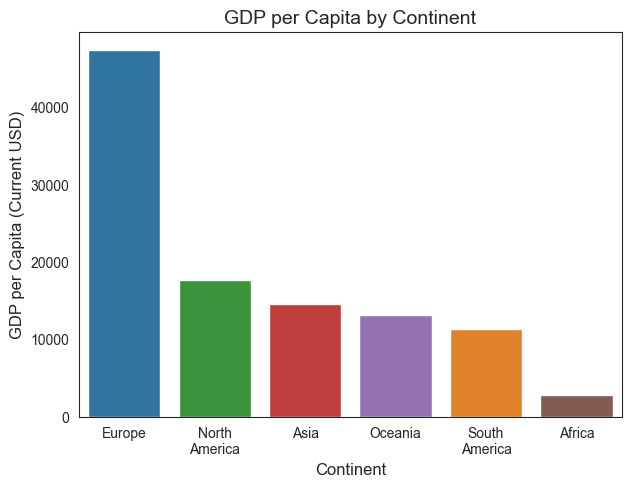

In [17]:
plt.figure(figsize=(7, 5))

df_grouped = df.groupby('Continent')['GDP per Capita (Current USD)'].mean().sort_values(ascending=False).reset_index()

df_grouped['Continent'] = df_grouped['Continent'].replace({
    'South America': 'South\nAmerica',
    'North America': 'North\nAmerica'
})

sns.barplot(data=df_grouped, x='Continent', y='GDP per Capita (Current USD)', hue='Continent', palette=continent_colors, saturation=1, legend=False)

plt.title('GDP per Capita by Continent', fontsize=14)
plt.ylabel('GDP per Capita (Current USD)', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.show()

The Unemployment Rate by Continent bar plot shows that while Europe has the lowest Unemployment Rate, Oceania has the highest.

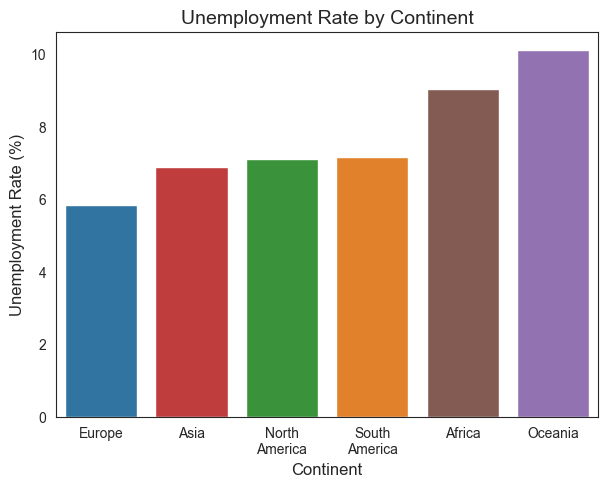

In [28]:
plt.figure(figsize=(7, 5))

df_grouped = df.groupby('Continent')['Unemployment Rate (%)'].mean().sort_values(ascending=True).reset_index()

df_grouped['Continent'] = df_grouped['Continent'].replace({
    'South America': 'South\nAmerica',
    'North America': 'North\nAmerica'
})

sns.barplot(data=df_grouped, x='Continent', y='Unemployment Rate (%)', hue='Continent', palette=continent_colors, saturation=1, legend=False)

plt.title('Unemployment Rate by Continent', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.show()

The GDP per Capita Category by Continent grouped bar chart shows that Africa has the lowest categories overall, with no High or Very High countries. Asia ranges from Very Low to Very High. North America, Oceania and South America fall in between, with few countries in the Very Low and Very High categories. Finally, Europe shows many countries in the High and Very High categories, few in the Low category, and none in the Very Low category.

In [19]:
order = ['Very Low', 'Low', 'Mid', 'High', 'Very High']

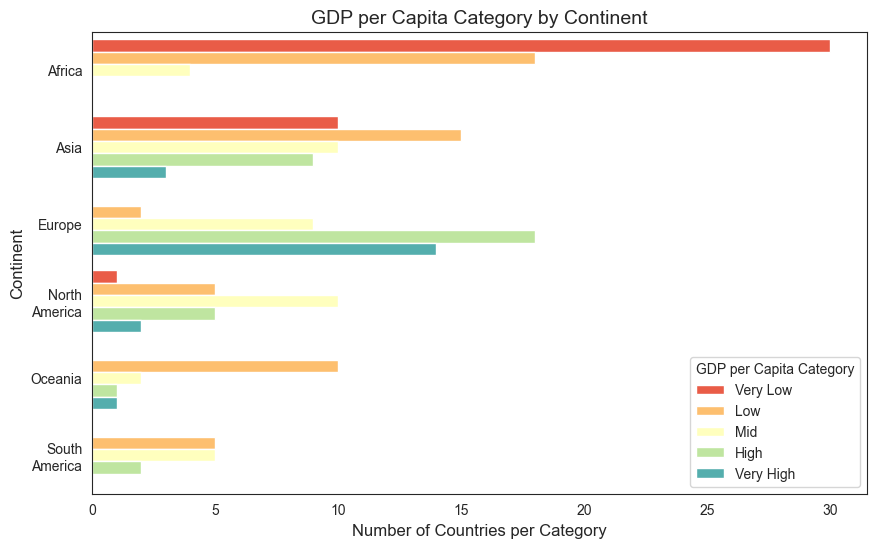

In [27]:
plt.figure(figsize=(10, 6))

df_grouped = df.groupby(['Continent', 'GDP per Capita Category']).size().reset_index(name='Count')

df_grouped['Continent'] = df_grouped['Continent'].replace({
    'South America': 'South\nAmerica',
    'North America': 'North\nAmerica'
})

sns.barplot(data=df_grouped, x='Count', y='Continent', hue='GDP per Capita Category', hue_order=order, palette='Spectral', saturation=1)

plt.title('GDP per Capita Category by Continent', fontsize=14)
plt.ylabel('Continent', fontsize=12)
plt.xlabel('Number of Countries per Category', fontsize=12)
plt.legend(title='GDP per Capita Category', loc='lower right', bbox_to_anchor=(1, 0), alignment='left')
plt.show()